In [1]:
import pandas as pd
import numpy as nm
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#store this dataset in house variable
house=pd.read_csv("C:\\Users\\anujr\\Downloads\\india house\\IndianHouses.csv")

In [3]:
house.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [4]:
house.shape # it consists 1259 rows and shape

(1259, 11)

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [6]:
house.describe

<bound method NDFrame.describe of          Area  BHK  Bathroom      Furnishing  \
0       800.0    3       2.0  Semi-Furnished   
1       750.0    2       2.0  Semi-Furnished   
2       950.0    2       2.0       Furnished   
3       600.0    2       2.0  Semi-Furnished   
4       650.0    2       2.0  Semi-Furnished   
...       ...  ...       ...             ...   
1254   4118.0    4       5.0     Unfurnished   
1255   1050.0    3       2.0  Semi-Furnished   
1256    875.0    3       3.0  Semi-Furnished   
1257    990.0    2       2.0     Unfurnished   
1258  11050.0    3       3.0     Unfurnished   

                                               Locality  Parking     Price  \
0                                      Rohini Sector 25      1.0   6500000   
1                J R Designers Floors, Rohini Sector 24      1.0   5000000   
2                   Citizen Apartment, Rohini Sector 13      1.0  15500000   
3                                      Rohini Sector 24      1.0   4200000   

In [7]:
#lets check for unique values
for i, var in enumerate(house.columns):
    print(house[var].value_counts(),i+1)
    

900.0      67
1500.0     50
1800.0     48
1000.0     42
1600.0     38
           ..
150.0       1
3250.0      1
4000.0      1
5500.0      1
11050.0     1
Name: Area, Length: 315, dtype: int64 1
3     541
2     367
4     220
1      96
5      27
6       6
7       1
10      1
Name: BHK, dtype: int64 2
2.0    551
3.0    355
1.0    146
4.0    138
5.0     57
6.0      7
7.0      3
Name: Bathroom, dtype: int64 3
Semi-Furnished    708
Unfurnished       363
Furnished         183
Name: Furnishing, dtype: int64 4
Lajpat Nagar 3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [8]:
house.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [9]:
house.isnull().sum().sum()

286

In [10]:
(house.isnull().sum().sum()/1289)*100 # 22 precent data is null

22.187742435996896

In [11]:
(house.isnull().sum()/1289)*100

Area            0.000000
BHK             0.000000
Bathroom        0.155159
Furnishing      0.387898
Locality        0.000000
Parking         2.560124
Price           0.000000
Status          0.000000
Transaction     0.000000
Type            0.387898
Per_Sqft       18.696664
dtype: float64

In [12]:
#only per_sqft has maximum percentage of null data

In [13]:
house.dropna(how='all',inplace=True) # remove the rows where both have null values

In [14]:
house.isnull().sum().sum()

286

In [15]:
house[house.isna().any(axis=1)] #this is for checking the null value with that data

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
30,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,NaN,13500000,Ready_to_move,Resale,Apartment,NaN
31,800.0,2,2.0,Unfurnished,Lajpat Nagar 1,1.0,15000000,Ready_to_move,New_Property,Builder_Floor,NaN
32,900.0,2,2.0,Unfurnished,Lajpat Nagar,1.0,10500000,Ready_to_move,New_Property,Builder_Floor,NaN
33,1080.0,3,2.0,Semi-Furnished,"Vikram Vihar, Lajpat Nagar",1.0,22500000,Ready_to_move,New_Property,Builder_Floor,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1185,900.0,2,2.0,Unfurnished,Kalkaji,2.0,15000000,Ready_to_move,Resale,Apartment,NaN
1199,2520.0,3,3.0,Unfurnished,Hauz Khas,NaN,47500000,Ready_to_move,New_Property,Builder_Floor,NaN
1200,1700.0,3,4.0,Unfurnished,Hauz Khas,2.0,45000000,Ready_to_move,New_Property,Builder_Floor,NaN
1229,2097.0,3,3.0,Unfurnished,Chittaranjan Park,NaN,29000000,Ready_to_move,Resale,Builder_Floor,NaN


In [16]:
#there are alot of rows from column per_square having null data to replace this data from null we find per square

In [17]:
house['Per_Sqft']=house["Per_Sqft"].fillna(house['Price']/house['Area']) 

In [18]:
house.isnull().sum()

Area            0
BHK             0
Bathroom        2
Furnishing      5
Locality        0
Parking        33
Price           0
Status          0
Transaction     0
Type            5
Per_Sqft        0
dtype: int64

In [19]:
house[house.isna().any(axis=1)]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
30,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,NaN,13500000,Ready_to_move,Resale,Apartment,9000.000000
90,900.0,1,1.0,Semi-Furnished,Lajpat Nagar 3,NaN,8900000,Ready_to_move,Resale,Builder_Floor,9888.888889
120,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,NaN,13500000,Ready_to_move,Resale,Apartment,9000.000000
269,2799.0,4,4.0,Semi-Furnished,"Kailash Colony, Greater Kailash",NaN,65000000,Ready_to_move,New_Property,Builder_Floor,23222.579493
299,700.0,2,2.0,Unfurnished,"Ram Nagar, Shahdara",NaN,4600000,Ready_to_move,New_Property,Builder_Floor,6571.428571
300,750.0,2,2.0,Semi-Furnished,"Jyoti Nagar West, Shahdara",NaN,9200000,Ready_to_move,Resale,Builder_Floor,12266.666667
509,450.0,2,2.0,NaN,"Gandhi Nagar, Shahdara",NaN,2900000,Ready_to_move,Resale,NaN,58000.000000
510,540.0,5,2.0,NaN,"Gandhi Nagar, Shahdara",NaN,17000000,Ready_to_move,Resale,NaN,58000.000000
511,1350.0,3,3.0,NaN,"Gandhi Nagar, Shahdara",NaN,25000000,Ready_to_move,Resale,NaN,18519.000000
512,2250.0,3,2.0,NaN,"Gandhi Nagar, Shahdara",NaN,10000000,Ready_to_move,Resale,NaN,4444.000000


In [20]:
# replace parking with 1
house['Parking']=house["Parking"].fillna(1)

In [21]:
#check null values
house.isnull().sum()

Area           0
BHK            0
Bathroom       2
Furnishing     5
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           5
Per_Sqft       0
dtype: int64

In [22]:
house=house.dropna()

In [23]:
#check again
house.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [24]:
#Now there is no null value in our dataset
#now change datatype
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1252 non-null   float64
 1   BHK          1252 non-null   int64  
 2   Bathroom     1252 non-null   float64
 3   Furnishing   1252 non-null   object 
 4   Locality     1252 non-null   object 
 5   Parking      1252 non-null   float64
 6   Price        1252 non-null   int64  
 7   Status       1252 non-null   object 
 8   Transaction  1252 non-null   object 
 9   Type         1252 non-null   object 
 10  Per_Sqft     1252 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 117.4+ KB


In [25]:
house['Bathroom']=house["Bathroom"].astype(int)
house['Parking']=house["Parking"].astype(int)

C:\Users\anujr\AppData\Local\Temp\ipykernel_11792\2260863341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['Bathroom']=house["Bathroom"].astype(int)
C:\Users\anujr\AppData\Local\Temp\ipykernel_11792\2260863341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['Parking']=house["Parking"].astype(int)


In [26]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1252 non-null   float64
 1   BHK          1252 non-null   int64  
 2   Bathroom     1252 non-null   int32  
 3   Furnishing   1252 non-null   object 
 4   Locality     1252 non-null   object 
 5   Parking      1252 non-null   int32  
 6   Price        1252 non-null   int64  
 7   Status       1252 non-null   object 
 8   Transaction  1252 non-null   object 
 9   Type         1252 non-null   object 
 10  Per_Sqft     1252 non-null   float64
dtypes: float64(2), int32(2), int64(2), object(5)
memory usage: 107.6+ KB


In [27]:
house['Parking'].value_counts() #change this 39 and 114 this both are incorrect 

1      822
2      341
3       54
4       16
5        7
39       7
114      3
9        1
10       1
Name: Parking, dtype: int64

In [28]:
house['Parking']=house['Parking'].replace(39,6)
house['Parking']=house['Parking'].replace(114,7)

C:\Users\anujr\AppData\Local\Temp\ipykernel_11792\1655695599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['Parking']=house['Parking'].replace(39,6)
C:\Users\anujr\AppData\Local\Temp\ipykernel_11792\1655695599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['Parking']=house['Parking'].replace(114,7)


In [29]:
house['Parking'].value_counts() # now the data is full cleaned

1     822
2     341
3      54
4      16
5       7
6       7
7       3
9       1
10      1
Name: Parking, dtype: int64

# Now analyze the data 

In [30]:
#check 1st 20 coastly house data
coastly=house.sort_values(by="Price",ascending=False)

In [31]:
coastly.head(20)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
109,8000.0,4,5,Semi-Furnished,Lajpat Nagar,1,240000000,Ready_to_move,New_Property,Builder_Floor,20000.0
57,8000.0,4,5,Semi-Furnished,Lajpat Nagar,1,240000000,Ready_to_move,New_Property,Builder_Floor,22000.0
242,6000.0,5,5,Semi-Furnished,"Maharani Bagh, New Friends Colony",9,220000000,Ready_to_move,New_Property,Builder_Floor,120000.0
1210,6500.0,4,5,Unfurnished,"Mayfair garden, Hauz Khas",3,190000000,Ready_to_move,New_Property,Builder_Floor,170000.0
1202,6000.0,5,5,Semi-Furnished,"Hauz Khas Apartment, Hauz Khas Enclave, Hauz Khas",3,180000000,Ready_to_move,New_Property,Apartment,30000.0
255,8150.0,4,5,Unfurnished,"Maharani Bagh, New Friends Colony",4,170000000,Ready_to_move,New_Property,Builder_Floor,15459.0
225,5025.0,5,6,Unfurnished,Greater Kailash 2,4,170000000,Almost_ready,New_Property,Builder_Floor,22222.0
495,5025.0,5,6,Unfurnished,Greater Kailash 2,4,170000000,Almost_ready,New_Property,Builder_Floor,22222.0
248,10350.0,4,7,Semi-Furnished,"Maharani Bagh, New Friends Colony",3,160000000,Ready_to_move,New_Property,Apartment,15459.0
585,5500.0,6,7,Furnished,Safdarjung Enclave,1,160000000,Ready_to_move,Resale,Apartment,14818.0


<Axes: xlabel='Locality', ylabel='Price'>

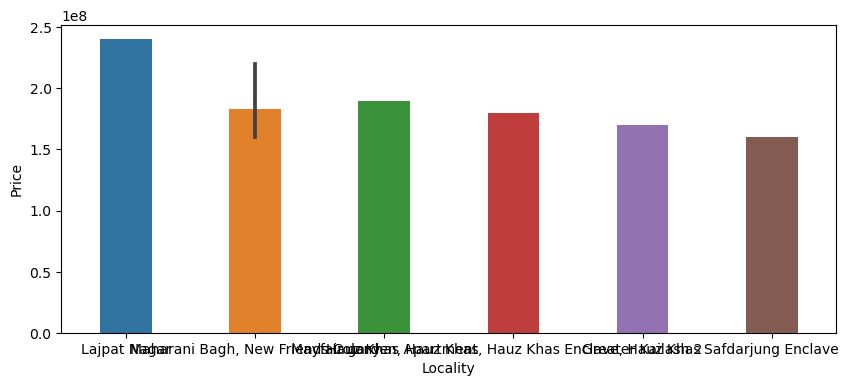

In [32]:
plt.figure(figsize=(10,4))
sns.barplot(x="Locality",y="Price",width=0.4,data=coastly.head(10))

In [33]:
#total sum with location
house.groupby(['Locality'],as_index=False)["Price"].sum().sort_values(by="Price",ascending=False).head(20)

,Locality,Price
145,"Kailash Colony, Greater Kailash",1351600000
169,Lajpat Nagar 3,1059700000
291,Safdarjung Enclave,1002800000
341,"The Leela Sky Villas, Patel Nagar",910300000
218,New Friends Colony,884000000
176,"Maharani Bagh, New Friends Colony",850000000
298,Saket,780300000
50,"Common Wealth Games Village, Commonwealth Game...",699700000
131,Hauz Khas,673000000
44,Chittaranjan Park,648200000


In [34]:
house['Locality'].value_counts().count()

363

In [35]:
#max amount
house.groupby(['Locality',"Bathroom","BHK"],as_index=False)["Price"].max().sort_values(by="Price",ascending=False).head(20)

,Locality,Bathroom,BHK,Price
289,Lajpat Nagar,5,4,240000000
317,"Maharani Bagh, New Friends Colony",5,5,220000000
345,"Mayfair garden, Hauz Khas",5,4,190000000
229,"Hauz Khas Apartment, Hauz Khas Enclave, Hauz Khas",5,5,180000000
213,Greater Kailash 2,6,5,170000000
316,"Maharani Bagh, New Friends Colony",5,4,170000000
318,"Maharani Bagh, New Friends Colony",7,4,160000000
511,Safdarjung Enclave,7,6,160000000
187,"Friends Colony East, New Friends Colony",5,5,135500000
401,"Orchid Metropolis, Hauz Khas",6,4,135000000


In [36]:
# sum having bathroom
house.groupby(["Bathroom"],as_index=False)["Price"].sum().sort_values(by="Price",ascending=False).head(20)

,Bathroom,Price
2,3,8261700000
3,4,6940370000
1,2,5620130000
4,5,4319100000
5,6,684400000
0,1,510340000
6,7,393700000


In [37]:
#sum having bhk
house.groupby(["BHK"],as_index=False)["Price"].sum().sort_values(by="Price",ascending=False).head(20)

,BHK,Price
3,4,10348270000
2,3,10299950000
1,2,3223180000
4,5,2314800000
0,1,268740000
5,6,231300000
6,7,26500000
7,10,17000000


In [38]:
#sum having bhk and bathroom
house.groupby(["BHK","Bathroom"],as_index=False)["Price"].sum().sort_values(by="Price",ascending=False).head(20)

,BHK,Bathroom,Price
8,3,3,6990300000
13,4,4,5537170000
14,4,5,3139600000
3,2,2,2801330000
7,3,2,2474050000
20,5,5,1157500000
12,4,3,1053600000
9,3,4,811200000
21,5,6,549400000
19,5,4,494000000


In [39]:
#min amount with location
house.groupby(['Locality',"Bathroom","BHK"],as_index=False)["Price"].min().sort_values(by="Price",ascending=True).head(20)

,Locality,Bathroom,BHK,Price
135,"DDA Lig Flats, Narela",1,1,1000000
369,Narela Sector A5,1,1,1000000
108,"DDA Flats Pocket 3, Narela",1,1,1000000
348,Mehrauli,1,1,1200000
58,Budh Vihar Phase 1,1,2,1400000
364,Narela,1,1,1490000
645,"Zakir Nagar, New Friends Colony",1,2,1500000
39,"Baljit Nagar, Patel Nagar",2,2,1500000
236,"Indra Park Palam, Manglapuri",1,1,1500000
368,Narela Sector A1 carpet area 42 sqyrd status R...,2,1,1500000


In [40]:
max_1=house.loc[house["Locality"]=="Kailash Colony, Greater Kailash"].sort_values(by="Price",ascending=False)

In [41]:
max_1.head() #kailash colony, greater kailash

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
275,3500.0,4,4,Semi-Furnished,"Kailash Colony, Greater Kailash",3,85000000,Ready_to_move,New_Property,Builder_Floor,20000.000000
279,3690.0,4,5,Semi-Furnished,"Kailash Colony, Greater Kailash",3,79000000,Almost_ready,New_Property,Builder_Floor,21409.000000
270,2650.0,4,4,Unfurnished,"Kailash Colony, Greater Kailash",2,75000000,Ready_to_move,New_Property,Builder_Floor,28301.886792
297,4500.0,4,5,Semi-Furnished,"Kailash Colony, Greater Kailash",2,72500000,Ready_to_move,Resale,Builder_Floor,20930.000000
272,3500.0,5,5,Semi-Furnished,"Kailash Colony, Greater Kailash",1,70000000,Ready_to_move,New_Property,Builder_Floor,20000.000000


In [42]:
max_1.shape

(30, 11)

In [79]:
countplt=house[['Furnishing','Type',"Status",'Transaction']]



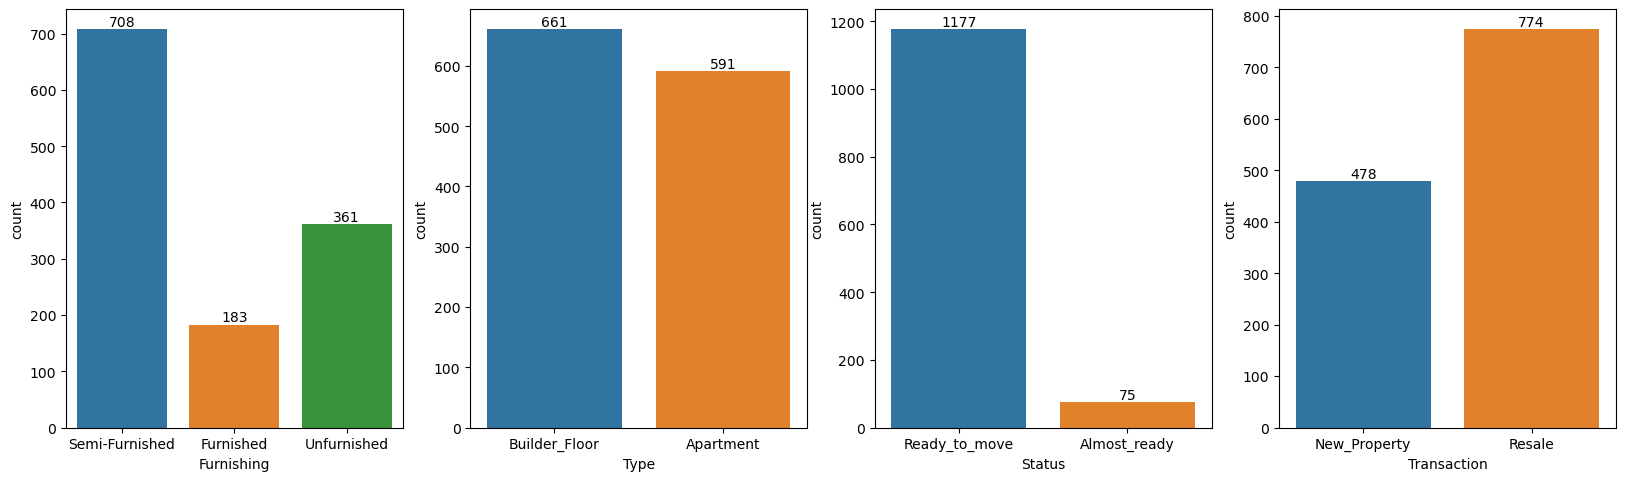

In [72]:
#this is data of 4 objects columns and their counts
plt.figure(figsize=(20,25))
for i, var in enumerate(countplt.columns):
    plt.subplot(4,4,i+1)
    ax=sns.countplot(x=countplt[var],data=countplt)
    for bars in ax.containers:
        ax.bar_label(bars)
    

In [113]:
type1=house.groupby(["Type"],as_index=False)['Price'].sum().sort_values(by="Price",ascending=False)
print(type1)

            Type        Price
1  Builder_Floor  15917340000
0      Apartment  10812400000


In [128]:
type2=house.groupby(["Type"],as_index=False)['Price'].count().sort_values(by="Price",ascending=False)
print(type2)

            Type  Price
1  Builder_Floor    661
0      Apartment    591


In [121]:
print(type1,type2)

            Type        Price
1  Builder_Floor  15917340000
0      Apartment  10812400000             Type  Price
1  Builder_Floor    661
0      Apartment    591


In [132]:
#AVerage
print('Builder_floor_average :',(15917340000/661)*100)
print('Apertment_average :',(10812400000/591)*100)



Builder_floor_average : 2408069591.527988
Apertment_average : 1829509306.2605753


In [133]:
fur1=house.groupby(["Furnishing"],as_index=False)['Price'].sum().sort_values(by="Price",ascending=False)


In [134]:
fur2=house.groupby(["Furnishing"],as_index=False)['Price'].count().sort_values(by="Price",ascending=False)


In [135]:

print(fur1,fur2)

       Furnishing        Price
1  Semi-Furnished  16125630000
2     Unfurnished   7397650000
0       Furnished   3206460000        Furnishing  Price
1  Semi-Furnished    708
2     Unfurnished    361
0       Furnished    183


In [139]:
#AVerage
print('Furnishing:',(16125630000/708)*100)
print('Semi-Furnished :',(7397650000/361)*100)
print('Unfurnished :',(3206460000/183)*100)

Furnishing: 2277631355.9322033
Semi-Furnished : 2049210526.3157892
Unfurnished : 1752163934.4262295


# #Conclusion
we got minimum amount from having bhk and bathroom 1,1 or 2,2

so people prefer to buying bhk accoring to bathroom,#if there is 2 bhk then they want 2 bathroom

and if there is 3 bhk then they prefer to buy 3 bathroom apertment

most peoples buy semifurnished aparments and builder floor